# Simulated quality control chart

In [5]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics




In [27]:
import math

In [6]:
np.random.seed(40)

In [10]:
# crete the data set
x = pd.Series(np.random.normal(loc = 10, scale = 2, size = 1000))

Text(0, 0.5, 'Counts')

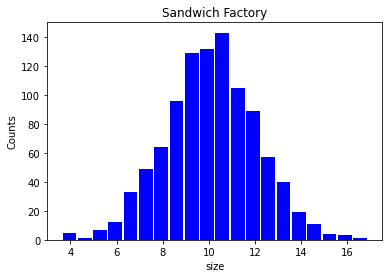

In [13]:
# make hist
x.plot.hist(bins = 20, rwidth = 0.9, color = 'blue')
plt.title('Sandwich Factory')
plt.xlabel('size')
plt.ylabel('Counts')

In [45]:
i = 1
n =  5
# Empty list
time_sum = list()
x_bar_summary = list()
z = list()

while i <= 24: #time is from 0 hour to 24 hour
    np.random.seed(i)
    sandwich = pd.Series(np.random.normal(loc = 10 + (i/11), scale = 2, size = 1000)) # mean shift
    sample_sandwich = random.choices(sandwich, k = n)

    x_bar = sum(sample_sandwich) / len(sample_sandwich)  # mean of n subway bread
    std = statistics.pstdev(sample_sandwich)   # standard deviation of n subway bread
    z_value = (x_bar - 10) / (std / math.sqrt(n))
    
    time_sum.append(i)
    x_bar_summary.append(x_bar)
    z.append(z_value)

    i = i + 1
 

In [43]:
df = pd.DataFrame()
df['time'] = time_sum
df['x_bar'] = x_bar_summary
df['z'] = z

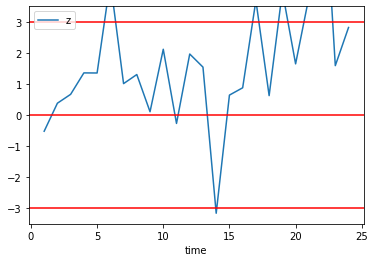

In [44]:
result = df.plot(x = "time", y = "z", kind = "line")
result.set_ylim([-3.5, 3.5])
result.axhline(y = 0, color = 'red', linestyle = '-')
result.axhline(y = -3, color = 'red', linestyle = '-')
result.axhline(y = 3, color = 'red', linestyle = '-')